# Reddit Climate Change
Supervision: Prof. Dr. Jan Fabian Ehmke

Group members: Britz Luis, Huber Anja, Krause Felix Elias, Preda Yvonne-Nadine

Time: Summer term 2023 

Data: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

## Project Understanding
- Research question / project goal --> will be set after first data investigation and group discussion
- Legal limitations? Privacy limitations?
- How does Reddit work? What is a subcomment and a subreddit? Who is giving the name to a subreddit; the author of the subreddit?
- Does the score come from the reddit platform? What is it?

In [1]:
# Preparing the environment
%pip install pandas
%pip install wordcloud
%pip install nltk
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Importing data
raw_comments = pd.read_csv('data/the-reddit-climate-change-dataset-comments.csv', nrows=1000) # Sample for start!
raw_posts = pd.read_csv('data/the-reddit-climate-change-dataset-posts.csv', nrows=1000)

## Data Unterstanding
- What data do we have? 
- What do we need to take care of in data preparation?


### Comments Dataset

In [10]:
# Checking 'comments' dataset structure
raw_comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1


In [11]:
# Checking datatypes of 'comments' dataset
raw_comments.dtypes

type               object
id                 object
subreddit.id       object
subreddit.name     object
subreddit.nsfw       bool
created_utc         int64
permalink          object
body               object
sentiment         float64
score               int64
dtype: object

In [16]:
# Convert comments timestamps and create a date column
raw_comments['created_converted'] = pd.to_datetime(raw_comments['created_utc'], utc=True)
raw_comments['created_date'] = pd.to_datetime(raw_comments['created_converted']).dt.normalize()

In [17]:
raw_comments["created_converted"]

0     1970-01-01 00:00:01.661990368+00:00
1     1970-01-01 00:00:01.661990340+00:00
2     1970-01-01 00:00:01.661990327+00:00
3     1970-01-01 00:00:01.661990278+00:00
4     1970-01-01 00:00:01.661990206+00:00
                      ...                
995   1970-01-01 00:00:01.661964929+00:00
996   1970-01-01 00:00:01.661964928+00:00
997   1970-01-01 00:00:01.661964921+00:00
998   1970-01-01 00:00:01.661964910+00:00
999   1970-01-01 00:00:01.661964899+00:00
Name: created_converted, Length: 1000, dtype: datetime64[ns, UTC]

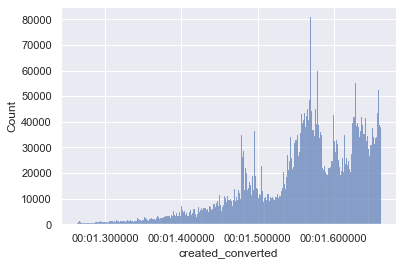

In [6]:
# Distribution of datapoints
sns.set(style="darkgrid")
sns.histplot(data=raw_comments, x="created_converted")
plt.show()

#### To Dos, Open Questions and Learnings for Comments Dataset
- Convert timestamp --> when converted there are posts from 1970, erroneos data? or something wrong with datetime conversion?
- There is already a sentiment score, how is it created and what does it mean? what is the scale?
- How much data is there per time unit / is the data equally distributed over time? --> the data is not equally distributed, there is way less data from the beginning of the tracking and more recent data, also there is a huge peak in the data, probably interesting to be explored

### Posts Dataset

In [5]:
# Checking 'posts' dataset structure
raw_posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1


In [35]:
# Checking datatypes of 'posts' dataset
raw_posts.dtypes

type                              object
id                                object
subreddit.id                      object
subreddit.name                    object
subreddit.nsfw                      bool
created_utc                        int64
permalink                         object
domain                            object
url                               object
selftext                          object
title                             object
score                              int64
created_converted    datetime64[ns, UTC]
dtype: object

In [39]:
# Convert post timestamps and create a date column
raw_posts['created_converted'] = pd.to_datetime(raw_posts['created_utc'], utc=True)
raw_posts['created_date'] = pd.to_datetime(raw_posts['created_converted']).dt.normalize()

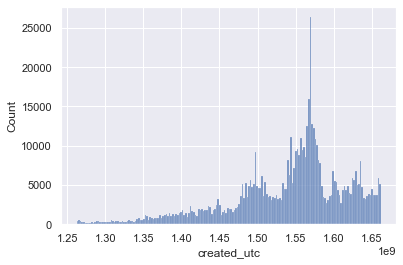

In [45]:
# Distribution of datapoints
sns.set(style="darkgrid")
sns.histplot(data=raw_posts, x="created_converted")
plt.show()

#### To Dos, Open Questions and Learnings for Posts Dataset
- What types are there in the post dataset? Only posts?
- Subreddits are comments underneath a main post? 
- Convert timestamp and check for what timeframe there are posts and comments --> when converted there are posts from 1970, erroneos data? or something wrong with datetime conversion?
- Nsfw = "not safe for work"; bad content?
- What domains are there? and what does it mean if there is a domain such as twitter? posts get retweeted / reused from other platforms? 
- How much data is there per time unit / is the data equally distributed over time? --> the data is not equally distributed, there is way less data from the beginning of the tracking and more recent data, also there is a huge peak in the data, probably interesting to be explored, we have way more comment data than post data

### Ideas so far
- Sentiment analysis (basic)
- Bot/troll detection (advanced)
- Something with network analysis (joining posts and comments if possible)
- Use reddit API to get more features

## Data Preparation

## Modeling

## Evaluation

## Deployment
Since this project is only for training purpose there probably won't be a live deployment